# Measure clad height from image

Initial setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Imports

In [2]:
import cv2
import matplotlib
import numpy as np
from matplotlib import pyplot as plt

Compare original with gray scale image

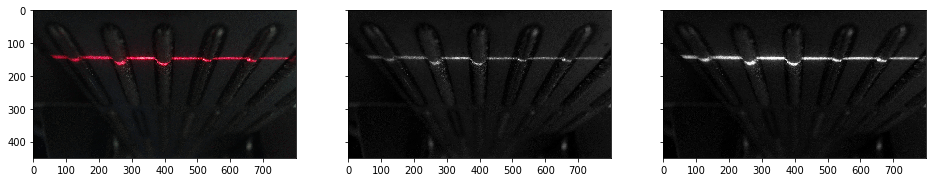

In [3]:
# Load the image in color (OpenCV standard = BGR)
orig = cv2.imread("./img/frames_1/png/frame_15_delay-0.2s.png", cv2.IMREAD_COLOR)
# Convert to RGB
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

# Get oly R spectrum and plot as grayscale
red_to_gray = orig[:,:,0]

# Load the image in grayscale
gray = cv2.imread("./img/frames_1/png/frame_15_delay-0.2s.png", cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 3, figsize=(16, 12), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(orig)
ax[1].imshow(gray, 'gray')
ax[2].imshow(red_to_gray, 'gray')

Gray scale images may show regions that are not relevant. Maybe a better idea would be to apply threshold in the original image to find red regions

## Rotate image

### Rotate, but cropping borders

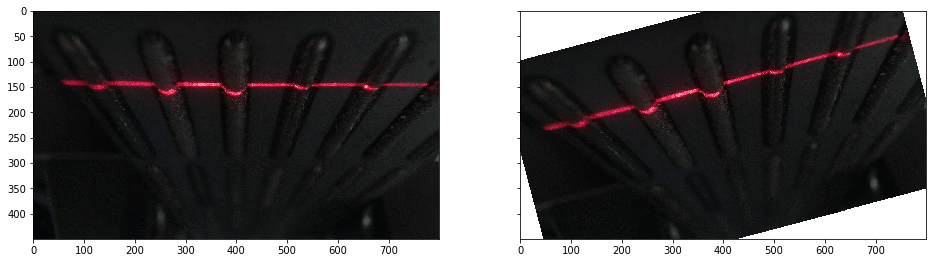

In [4]:
# https://stackoverflow.com/questions/52617318/python-rotate-image

from PIL import Image

def rotate_img(img_path, rt_degr):
    img = Image.open(img_path)
    return img.rotate(rt_degr)

img_rt_90 = rotate_img('./img/frames_1/png/frame_15_delay-0.2s.png', 15)

fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(orig)
ax[1].imshow(img_rt_90)


### Rotate without cropping borders

Source: 

https://stackoverflow.com/posts/37347070/revisions
    
within

https://stackoverflow.com/questions/22041699/rotate-an-image-without-cropping-in-opencv-in-c/33564950#33564950
    

In [5]:
def rotate_image(mat, angle):
  # angle in degrees

  height, width = mat.shape[:2]
  image_center = (width/2, height/2)

  rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1.)

  abs_cos = abs(rotation_mat[0,0])
  abs_sin = abs(rotation_mat[0,1])

  bound_w = int(height * abs_sin + width * abs_cos)
  bound_h = int(height * abs_cos + width * abs_sin)

  rotation_mat[0, 2] += bound_w/2 - image_center[0]
  rotation_mat[1, 2] += bound_h/2 - image_center[1]

  rotated_mat = cv2.warpAffine(mat, rotation_mat, (bound_w, bound_h))
  return rotated_mat

Implementation

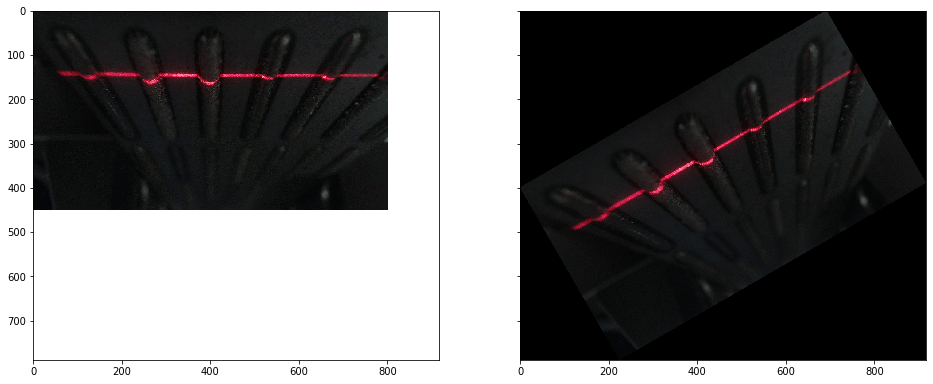

In [6]:
# Create image using rotate_image function
img_rt_30 = rotate_image(orig, 30)

# Plot result comparing with original image
fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(orig)
ax[1].imshow(img_rt_30)

## Use red matrix as input to black and white image

In [7]:
orig.shape

(450, 800, 3)

In [8]:
im_red = orig[:,:,0]

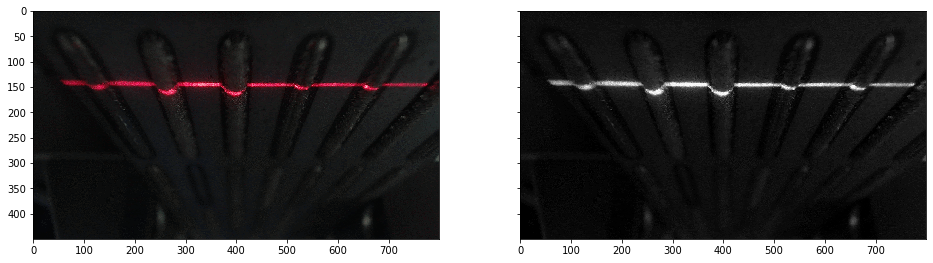

In [9]:
# Plot result comparing with original image
fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(orig)
ax[1].imshow(im_red, 'gray')

# Código João Vitor

In [10]:
import cv2
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, interact_manual

## Explorando dados

In [11]:
# Conjunto de imagens {nome da imagem: (Original, Escala de cinza) }
images = {}
ORIG = 0
GRAY = 1

# Imagem utilizada como referência
img = None

# Caminho dos dados
FILEPATH = "img/frames_1/png/"

# Carregar imagens 
for x in range(0,21):
 
    # Nome da imagem
    label = "frame_%.2d_delay-0.2s.png" %x

    # Caminho do imagem
    path = FILEPATH + label

    # Carregar a imagem na cor BGR (Padrão Opencv)
    orig = cv2.imread(path, cv2.IMREAD_COLOR)

    # Converter para RGB
    orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

    # Carregar imagem em escala de cinza
    gray = orig[:,:,0]

    # Salvando imagens no dicionario
    images[label] = (orig, gray)

# Visualizando imagem selecionada
def view_image(label):
    
    # Referênciando variavel global
    global images, img

    # Definindo imagem de referência
    img = images[label]
    
    # Recuperando imagem 
    orig, gray = img
    
    # Plotar imagens
    fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
    ax = axes.ravel()
    ax[0].imshow(orig)
    ax[1].imshow(gray, 'gray')

# Selecionar imagem apartir da escolha do usuário
interactive(view_image, label=images.keys())
    

interactive(children=(Dropdown(description='label', options=('frame_00_delay-0.2s.png', 'frame_01_delay-0.2s.p…

## Filtro Binario

In [12]:
modes = ['cv2.THRESH_BINARY',
         'cv2.THRESH_BINARY_INV',
         'cv2.THRESH_TRUNC',
         'cv2.THRESH_TOZERO',
         'cv2.THRESH_TOZERO_INV']

# Basic threshold example
def my_threshold(label, thresh, modeStr):
    global dst
    
    mode = eval(modeStr)
    
    orig, label = images[label]

    th, dst = cv2.threshold(label, thresh, 255, mode)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
    
    ax = axes.ravel()
    
    
    ax[0].imshow(label,'gray')
    ax[1].imshow(dst,'gray')

# Pass function & its parameters to interactive
interactive(my_threshold, label=images.keys(), thresh = (0, 255), modeStr=modes)

interactive(children=(Dropdown(description='label', options=('frame_00_delay-0.2s.png', 'frame_01_delay-0.2s.p…

## Refining

In [13]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,3))
print(kernel)

print("-")

kernel2 = np.ones((1,5),np.uint8)
print(kernel2)

kernel3 = np.ones((5,5), np.uint8)

[[0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]]
-
[[1 1 1 1 1]]


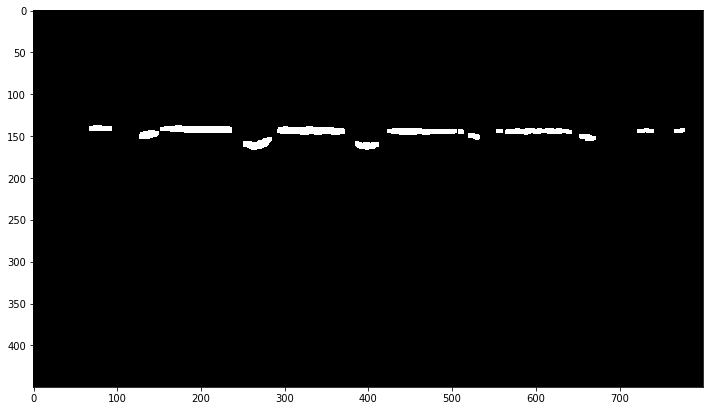

In [14]:
dst_closed = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel3)
# Set the size to show
plt.figure(figsize = (12,10))
# Show it!
plt.imshow(dst_closed, 'gray')

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def my_image_alignment(img):
    
    # Define dimensoes da imagem
    h, w = dst.shape
    
    # Vetor de medias   
    white_avg = np.array([])
    
    # Loop varrendo cada coluna da imagem
    for x in range(0, w):
        
        # Vetor de linhas brancas
        white = np.array([])
        
        # Loop em uma coluna, por várias linhas
        for y in range(0, h):
            if img[y,x] > 0:             
                white = np.append(white, y)  
        
        # Adiciona média das linhas ao vetor white_avg 
        white_avg = np.append(white_avg,np.mean(white))     
    
    # Print 
    return white_avg    

c:\users\avell\anaconda3\envs\opencv-env\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\avell\anaconda3\envs\opencv-env\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


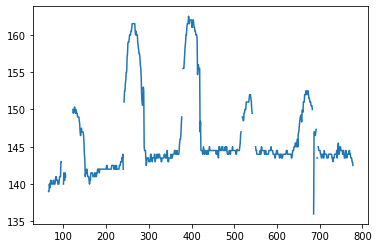

In [16]:
result = my_image_alignment(dst)
plt.plot(result)

(0, 800, 0, 450)

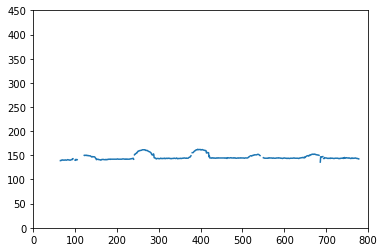

In [17]:
plt.plot(result)
plt.axis((0,800,0,450))

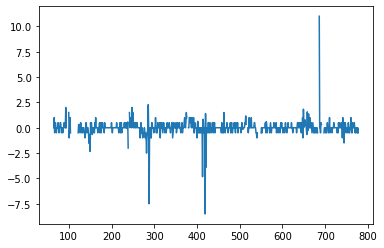

In [18]:
difference = np.diff(result)
plt.plot(difference)
#plt.plot(result)

In [181]:
import math

def firstNonNan(listfloats):
    for item in range(0,len(listfloats)):
        if math.isnan(listfloats[item]) == False:
            return [item,listfloats[item]]
        
def lastNonNan(listfloats):
    for item in reversed(range(0,len(listfloats))):
        if math.isnan(listfloats[item]) == False:
            return [item,listfloats[item]]

In [182]:
a = np.array(firstNonNan(result))
a

array([ 64. , 135.5])

In [183]:
b = np.array(lastNonNan(result))
b

array([781., 140.])

In [184]:
catetos = b-a
catetos

array([717. ,   4.5])

In [185]:
ang = math.atan(catetos[1]/catetos[0])*180/np.pi
ang

0.35959222114646044

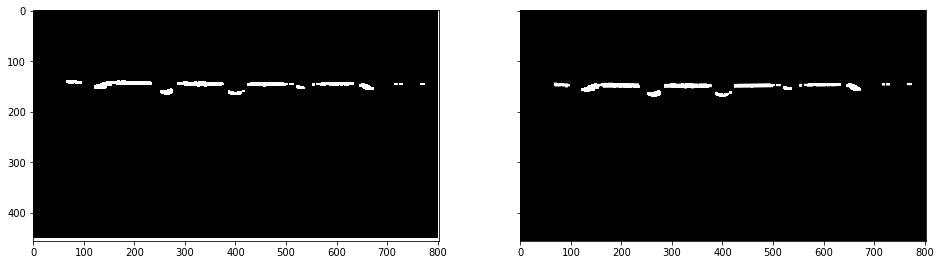

In [44]:
# Create image using rotate_image function
img_rt_ang = rotate_image(dst_closed, ang)

# Plot result comparing with original image
fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(dst_closed, 'gray')
ax[1].imshow(img_rt_ang, 'gray')

# Rotate input image

In [45]:
input_image = rotate_image(dst_closed,30)

In [46]:
input_image.shape

(789, 917)

In [47]:
def my_image_alignment(img):
    
    # Define dimensoes da imagem
    h, w = dst.shape
    
    # Vetor de medias   
    white_avg = np.array([])
    
    # Loop varrendo cada coluna da imagem
    for x in range(0, w):
        
        # Vetor de linhas brancas
        white = np.array([])
        
        # Loop em uma coluna, por várias linhas
        for y in range(0, h):
            if img[y,x] > 0:             
                white = np.append(white, y)  
        
        # Adiciona média das linhas ao vetor white_avg 
        white_avg = np.append(white_avg,np.mean(white))     
    
    # Print 
    return white_avg

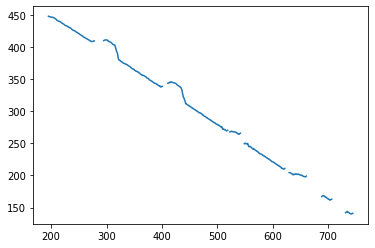

In [48]:
result = my_image_alignment(input_image)
plt.plot(result)

In [162]:
a = np.array(firstNonNan(result))
a

b = np.array(lastNonNan(result))
b

catetos = b-a
catetos

ang = math.atan(catetos[1]/catetos[0])*180/np.pi
ang

NameError: name 'firstNonNan' is not defined

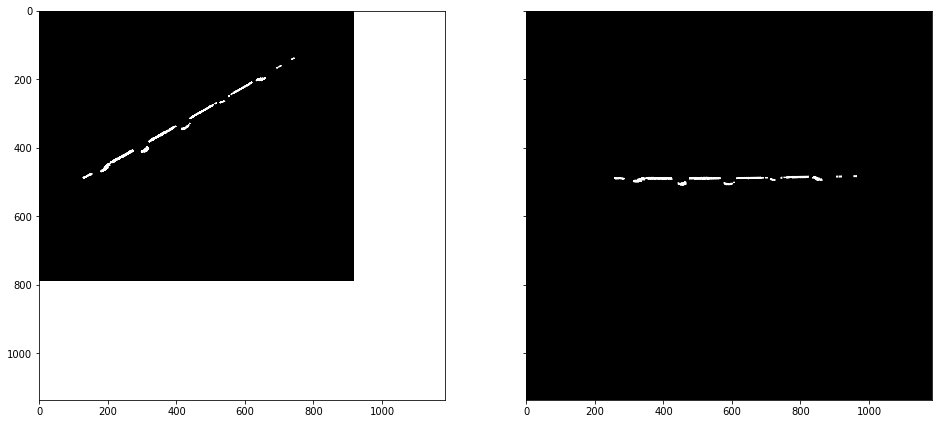

In [50]:
# Create image using rotate_image function
img_rt_ang = rotate_image(input_image, ang)

# Plot result comparing with original image
fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(input_image, 'gray')
ax[1].imshow(img_rt_ang, 'gray')

Initial setup

Imports

Import data

Apply filter

In [ ]:
## Initial setup
## Import libraries
## Import data
## Convert original to gray scale
## Apply binary filter
## Refine image
## Apply dilation and erosion
## Calculate average profile
## Rotate image based on border average values
## Define bottom reference average value with histogram 
## Calculate difference between maximum average profile value and bottom average value
## Display clad height

## Initial setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Import libraries

In [5]:
import cv2
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, interact_manual

## Import data and 

In [6]:
# Conjunto de imagens {nome da imagem: (Original, Escala de cinza) }
images = {}
ORIG = 0
GRAY = 1

# Imagem utilizada como referência
img = None

# Caminho dos dados
FILEPATH = "img/frames/png/"

# Carregar imagens 
for x in range(0,21):
 
    # Nome da imagem
    label = "frame_%.2d_delay-0.2s.png" %x

    # Caminho do imagem
    path = FILEPATH + label

    # Carregar a imagem na cor BGR (Padrão Opencv)
    orig = cv2.imread(path, cv2.IMREAD_COLOR)

    # Converter para RGB
    orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
    
    # Carregar imagem em escala de cinza
    gray = orig[:,:,0]

    # Salvando imagens no dicionario
    images[label] = (orig, gray)

Visualize data

In [161]:
def view_selected_image(index):
    
    # Define images
    orig = images["frame_%0.2d_delay-0.2s.png"%index][0]
    gray = images["frame_%0.2d_delay-0.2s.png"%index][1]
    
    # Plotar imagens
    fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
    ax = axes.ravel()
    ax[0].imshow(orig)
    ax[1].imshow(gray, 'gray')

# Selecionar imagem apartir da escolha do usuário
interactive(view_selected_image, index  = (0,20))

interactive(children=(IntSlider(value=10, description='index', max=20), Output()), _dom_classes=('widget-inter…

## Initial setup

In [256]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Import libraries

In [235]:

import cv2
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, interact_manual
import math
import statistics

## Import data

In [201]:
# Import data

## Dictionary of images {"label1" : {"stage1": data1, "stage2": data2, ...}, "label2": {"stage1": data1, "stage2": data2, ...} }
images = {}

## Caminho dos dados
FILEPATH = "img/frames/png/"

## Import data
for x in range(0,21):
 
    # File label
    label = "frame_%.2d_delay-0.2s.png" %x

    # Filepath
    path = FILEPATH + label

    # Load image in BGR (Opencv Standard)
    orig = cv2.imread(path, cv2.IMREAD_COLOR)

    # Convert to RGB
    orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
    
    # Store in dictionary
    images[label] = {}
    images[label]['orig'] = orig

## Convert to gray scale

In [202]:
## Convert original to gray scale
for x in range(0,21):
 
    # File label
    label = "frame_%.2d_delay-0.2s.png" %x

    # Set red values as grayscale image (greater Red values become greater White values)
    ## As the measurements are based on the red track, the red values are what is important in the pictures
    gray = images[label]['orig'][:,:,0]
    
    # Store in dictionary
    images[label]['gray'] = gray

## Apply binary filter (threshold)

In [203]:
## Apply binary filter (threshold)
for x in range(0,21):
 
    # File label
    label = "frame_%.2d_delay-0.2s.png" %x
    
    # Apply threshold binary
    th, dst = cv2.threshold(images[label]['gray'], 127, 255, cv2.THRESH_BINARY)
    
    # Store in dictionary
    images[label]['dst'] = dst

## Refine image

In [204]:
## Refine image

## Define kernel
kernel = np.ones((1,3), np.uint8)

for x in range(0,21):
 
    # File label
    label = "frame_%.2d_delay-0.2s.png" %x
    
    # Clean noise (opening)
    dst_open = cv2.morphologyEx(images[label]['dst'], cv2.MORPH_OPEN, kernel)
    
    # Store in dictionary
    images[label]['dst_open'] = dst_open


## Calculate average profile

In [205]:
## Calculate average profile

### Receive image as input and returns array [1, imgColumns] with average of line number values where pixel is white
def average_profile(img):
    
    # Define dimensoes da imagem
    imgRows, imgColumns = dst.shape
    
    # Vetor de medias   
    avgProfile = np.array([])
    
    # Loop varrendo cada coluna da imagem
    for column in range(0, imgColumns):
        
        # Vetor de linhas brancas
        whiteRowIndexes = np.array([])
        
        # Loop em uma coluna, por várias linhas
        for row in range(0, imgRows):
            if img[row,column] > 0:             
                whiteRowIndexes = np.append(whiteRowIndexes, row)  
        
        # Adiciona média das linhas ao vetor avgProfile 
        avgProfile = np.append(avgProfile,np.mean(whiteRowIndexes))     
    
    # Print 
    return avgProfile 


# Loop through every image and create array with average white profile
for x in range(0,21):
 
    # File label
    label = "frame_%.2d_delay-0.2s.png" %x
    
    # Create average profile for all images
    images[label]['avg_profile'] = average_profile(images[label]['dst_open'])


## Rotate image based on border average values

In [213]:
## Rotate image based on border average values

### Define function to get first non NaN item and its index
def firstNonNan(listfloats):
    for item in range(0,len(listfloats)):
        if math.isnan(listfloats[item]) == False:
            return [item,listfloats[item]]

### Define function to get last non NaN item and its index
def lastNonNan(listfloats):
    for item in reversed(range(0,len(listfloats))):
        if math.isnan(listfloats[item]) == False:
            return [item,listfloats[item]]
        
def rotate_image(mat, angle):
    # angle in degrees

    height, width = mat.shape[:2]
    image_center = (width/2, height/2)

    rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1.)

    abs_cos = abs(rotation_mat[0,0])
    abs_sin = abs(rotation_mat[0,1])

    bound_w = int(height * abs_sin + width * abs_cos)
    bound_h = int(height * abs_cos + width * abs_sin)

    rotation_mat[0, 2] += bound_w/2 - image_center[0]
    rotation_mat[1, 2] += bound_h/2 - image_center[1]

    rotated_mat = cv2.warpAffine(mat, rotation_mat, (bound_w, bound_h))
    return rotated_mat
     
    
# Loop through every image and create array with average white profile
for x in range(0,21):
 
    # File label
    label = "frame_%.2d_delay-0.2s.png" %x
    
    # Get average profile for that image
    avg_profile = images[label]['avg_profile']
    
    
    # Get first white region average coordinates in format [column, rowAvg]
    firstPixel = np.array(firstNonNan(avg_profile))
    
    # Get last white region average coordinates in format [column, rowAvg]
    lastPixel = np.array(lastNonNan(avg_profile))
    
    # Calculate triangle cathetus
    cathetus  = lastPixel - firstPixel
    
    # Calculate the inclination angle
    ang = math.atan(cathetus[1]/cathetus[0])*180/np.pi   
    
    # Create image using rotate_image function
    rotated_image = rotate_image(images[label]['dst_open'], ang)
    
    # Create average profile after rotating image
    avg_profile_rotated = average_profile(rotated_image)
    
    # Add calculated values to dictionary
    images[label]['firstPixel'] = firstPixel
    images[label]['lastPixel'] = firstPixel
    images[label]['cathetus'] = cathetus
    images[label]['ang'] = ang
    images[label]['rotated_image'] = rotated_image
    images[label]['avg_profile_rotated'] = avg_profile_rotated

## Calculate clad height in pixels

In [242]:
for x in range(0,21):
 
    # File label
    label = "frame_%.2d_delay-0.2s.png" %x
    
    # Define baseline
    bead_bottom = statistics.mode(images[label]['avg_profile_rotated'])
    
    # Bead top
    bead_top = np.nanmax(images[label]['avg_profile_rotated'])
    
    # Bead height
    bead_height_pixels = bead_top - bead_bottom
    
    # Write in dictionary
    images[label]['bead_bottom'] = bead_bottom
    images[label]['bead_top'] = bead_top
    images[label]['bead_height_pixels'] = bead_height_pixels

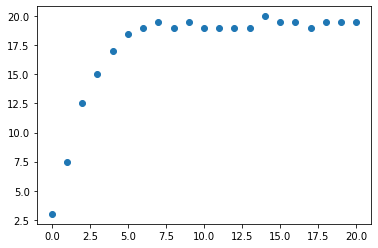

In [255]:
height = []

for i in range(0,21):
    height.append(images["frame_%.2d_delay-0.2s.png" %i]['bead_height_pixels'])

plt.plot(height, 'o')